In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
img_array = cv2.imread('dataset/train/closed/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

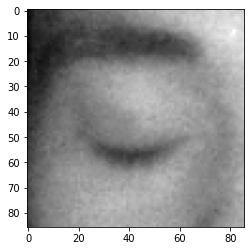

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape

(86, 86)

In [5]:
import os

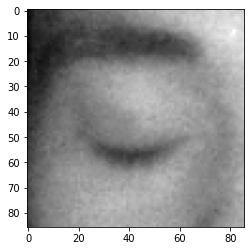

In [6]:
Datadirectory = './dataset/train'
Classes = ['closed', 'open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

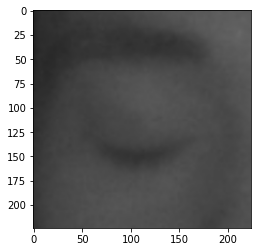

In [7]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

## reading all imaged and converting them into an array for data and label

In [8]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
   

In [9]:
create_training_data()

In [10]:
print(len(training_data))

3242


In [11]:
import random
random.shuffle(training_data)

In [12]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)
# mobilenet needs rgb
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(3242, 224, 224, 3)

In [14]:
X = X/255.0

In [15]:
Y = np.array(y)

# use pickle here

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-4].output

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [22]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [26]:
new_model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer = "adam", metrics = ["accuracy"])

In [27]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
92/92 [==============================] - 300s 3s/step - loss: 0.1439 - accuracy: 0.9534 - val_loss: 5.1590 - val_accuracy: 0.6154
Epoch 2/2
92/92 [==============================] - 268s 3s/step - loss: 0.0682 - accuracy: 0.9736 - val_loss: 4.1423 - val_accuracy: 0.6246


In [3]:
new_model.save('my_model.h5')

NameError: name 'new_model' is not defined

In [2]:
new_model = tf.keras.models.load_model('my_model.h5')

In [6]:
img_size = 224
img_array = cv2.imread('./dataset/train/closed//s0001_00004_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

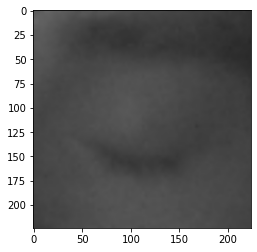

In [7]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
plt.imshow(new_array)

In [8]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[7.5882425e-11]], dtype=float32)

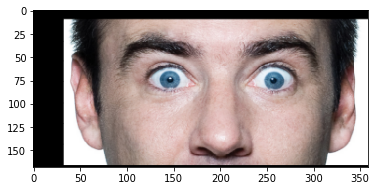

In [9]:
img = cv2.imread('./Untitled.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
import os
faceCascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_eye.xml")

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
eyes = eyeCascade.detectMultiScale(gray, 1.1,4)

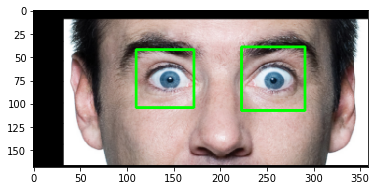

In [14]:
for(x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [38]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

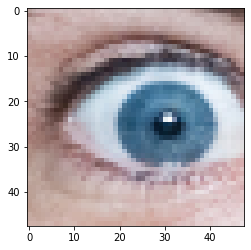

In [39]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [40]:
eyes_roi.shape

(48, 48, 3)

In [41]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [42]:
new_model.predict(final_img)

array([[0.9999887]], dtype=float32)

In [16]:
import cv2
faceCascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_frontalface_default.xml")
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(os.path.dirname(cv2.__file__) + "/data/haarcascade_eye.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1,4)
    eyes_roi = ''
    for x, y,w, h in eyes:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes not detected")
        else:
            for ex, ey, ew, eh in eyess :
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    if(eyes_roi == ''):  
        continue
    final_img = cv2.resize(eyes_roi, (224,224))
    final_img = np.expand_dims(final_img, axis=0)
    final_img = final_img/255.0
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)

    predictions = new_model.predict(final_img)
    #print(predictions)
    if predictions > 0.5 :
        print('open')
    else:
        print('close')
    cv2.imshow('h', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
    

eyes not detected
eyes not detected
False


C:\Users\Int\AppData\Local\Temp\ipykernel_13276\2482858552.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(eyes_roi == ''):


close
eyes not detected
False
close
False
close
eyes not detected
False
close
eyes not detected
False
close
False
close
False
close
False
close
False
close
False
close
eyes not detected
False
close
eyes not detected
False
close
False
close
False
close
False
open
False
open
False
open
False
open
False
open
False
open
eyes not detected
False
close
False
open
False
close
eyes not detected
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
False
close
eyes not detected
False
close
False
open
eyes not detected
False
close
eyes not detected
False
open
False
close
False
close
False
close
eyes not detected
False
close
eyes not detected
False
close
eyes not detected
False
close
eyes not detected
False
close
False
open
False
open
eyes not detected
False
close
eyes not detected
eyes not detected
False
close
False
open
eyes not detected
False
close
False
open
eyes not detected
eyes not detected